## Task

1. EDA and Feature Engineering
2. Cleaning and Preparing the data for model training

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
## importing the training dataset

df_train = pd.read_csv('train.csv')
df_train.shape

(550068, 12)

In [78]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [79]:
## import test data set
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [80]:
##Merging both dataset
frames = [df_train, df_test]
final_df = pd.concat(frames)

In [81]:
final_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [82]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [83]:
final_df.drop(['User_ID'],axis=1,inplace=True)

In [84]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Data Preprocessing

1.Fixing categorical features 

In [85]:
## Handling Gender
final_df['Gender']=final_df['Gender'].map({'F':0, 'M':1})


In [86]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [87]:
## Handling Age

In [88]:
final_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [89]:
final_df['Age'] = final_df['Age'].map({'0-17':1,'18-25':2, '26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [90]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [91]:
## Another way of changing categorical into numerical

# Import label encoder
#from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
#df['species']= label_encoder.fit_transform(df['species'])

In [92]:
## handling City Category
df_city = pd.get_dummies(final_df['City_Category'], drop_first=True)

In [93]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [94]:
##Merging df_city with main df
final_df = pd.concat([final_df,df_city],axis=1)

In [95]:
## Dropping City
final_df.drop(['City_Category'],axis = 1,inplace = True)

In [96]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## Handling Missing Values

In [101]:
final_df.isnull().sum()
len(final_df)

783667

In [106]:
[features for features in final_df.columns if final_df[features].isnull().sum()>0]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [107]:
## Function to find missing values percent in the dataset

def missingValues(df):
    missingcontent = round(df.isnull().sum()/len(df)*100,2)
    print("Total Missing Values Percentage in Dataframe:", round(missingcontent.mean(),2))
    print(missingcontent[missingcontent>0].sort_values(ascending=False))

In [108]:
missingValues(final_df)

Total Missing Values Percentage in Dataframe: 10.9
Product_Category_3    69.65
Product_Category_2    31.39
Purchase              29.81
dtype: float64


In [105]:
##Plotting Missing Values


['Product_Category_2', 'Product_Category_3', 'Purchase']

<AxesSubplot:>

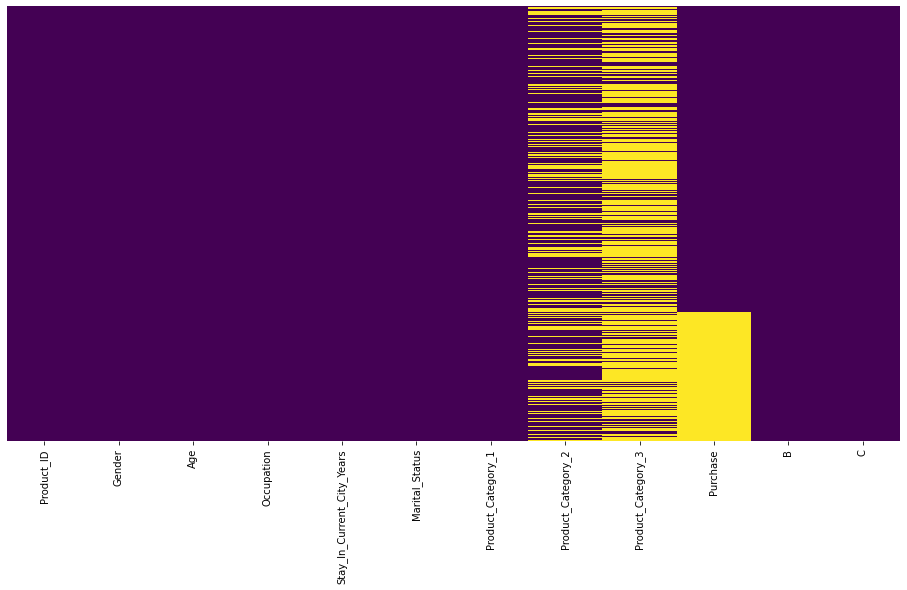

In [109]:
## Heat map to show the null values
plt.rcParams['figure.figsize'] = (16,8)
sns.heatmap(final_df.isnull(),yticklabels=False, cbar = False, cmap='viridis')



In [110]:
## Focus on replacing missing values in category as purchase will be null as it is in test data

In [111]:
final_df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [112]:
final_df['Product_Category_1'].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [118]:
## Since we have discrete feature in Product Category
## We will replace it with the mode

final_df['Product_Category_1'] = final_df['Product_Category_1'].fillna(final_df['Product_Category_1'].mode()[0])

In [121]:
final_df['Product_Category_2'] = final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [122]:
final_df['Product_Category_3'] = final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [123]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [127]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [129]:
final_df['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)

In [132]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [134]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [135]:
## We have few columns which have Dtype Object but are integers
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype(int)


In [136]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [137]:
final_df['B'] = final_df['B'].astype(int)

In [138]:
final_df['C'] = final_df['C'].astype(int)

/Users/abdullahmazhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

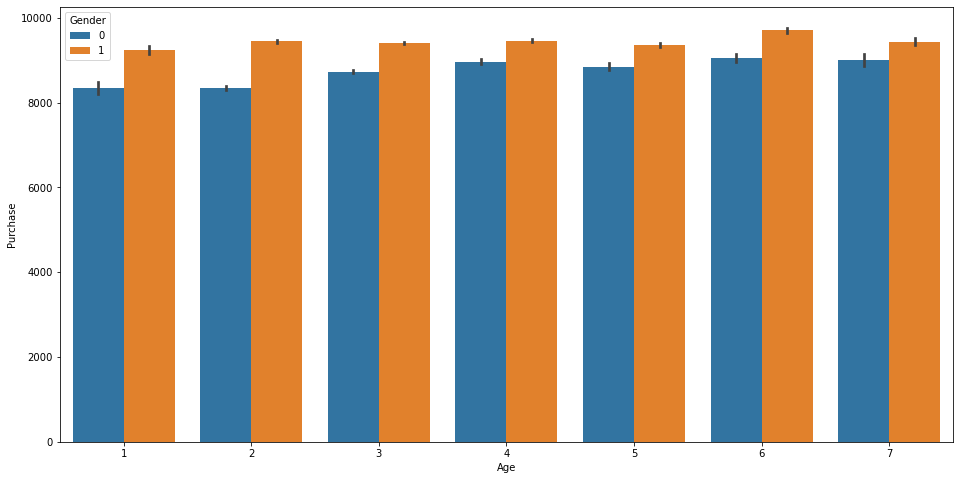

In [143]:
## Visualisation 
## Age vs Purchase

sns.barplot('Age','Purchase',hue='Gender',data=final_df)

## Observation
Purchasing of men is high then women.

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

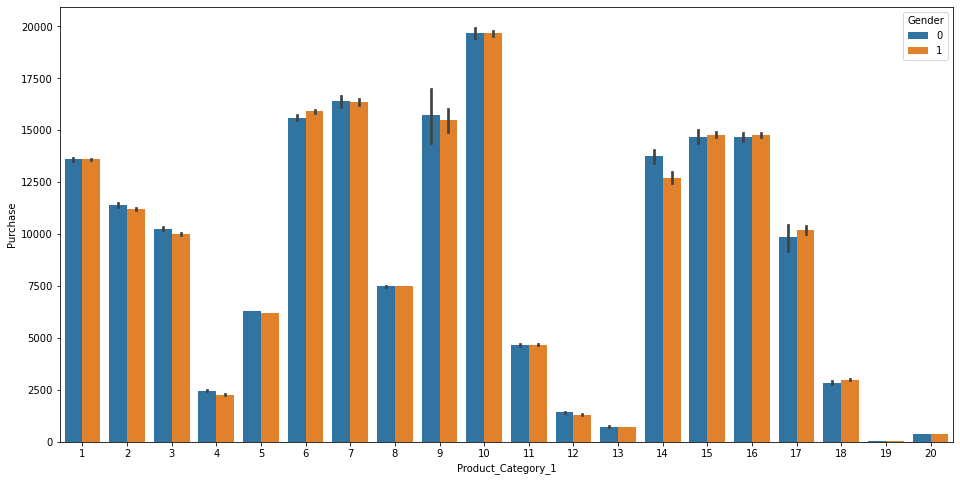

In [145]:
## Product Cat 1 with respect to purchase


sns.barplot('Product_Category_1','Purchase',hue='Gender',data=final_df)

/Users/abdullahmazhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

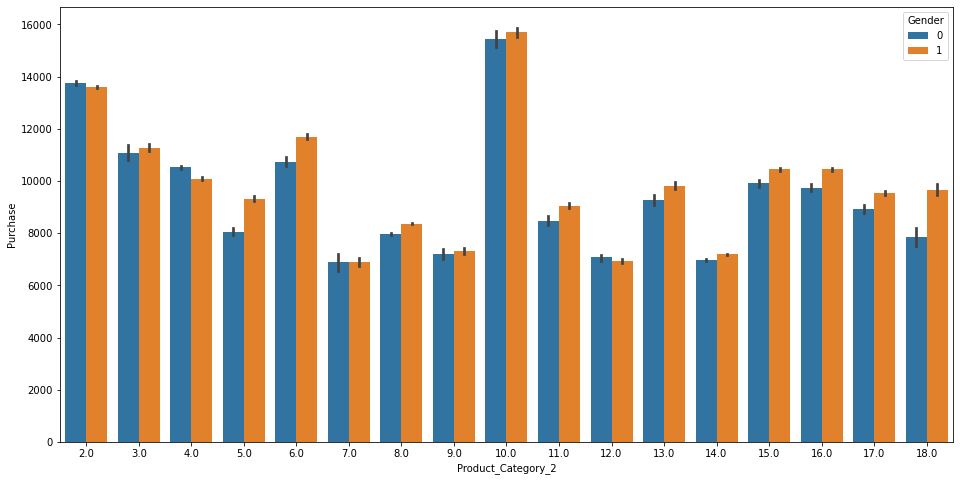

In [146]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=final_df)

/Users/abdullahmazhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

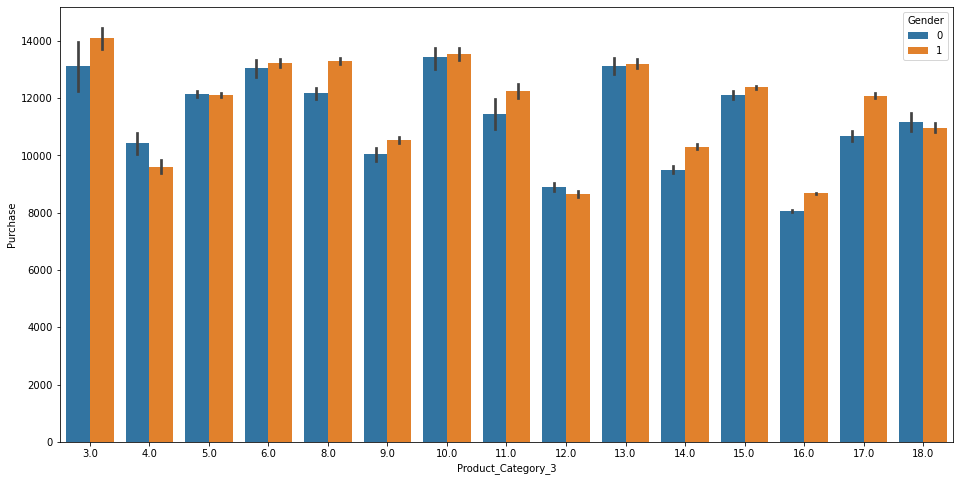

In [147]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=final_df)

In [148]:
## Dropping Product ID

final_df.drop('Product_ID',axis=1, inplace= True)

In [149]:
final_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


## Feature Scaling

In [154]:
df_test=final_df[final_df['Purchase'].isnull()]

In [155]:
df_train = final_df[~final_df['Purchase'].isnull()]

In [156]:
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [173]:
X = df_train.drop('Purchase',axis = 1)
y = df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [177]:
X_test

array([[ 0.57141282,  1.84716932,  1.67542193, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [-1.75004823,  0.37105599,  0.44863199, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823,  0.37105599, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [ 0.57141282, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 0.57141282,  0.37105599, -0.16476299, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [ 0.57141282, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374]])